# Квантмех¿

In [45]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
h=2
a = 10


Нас не особо волнуют значения, а важн только вид зависимости, так что все константы будем считать единицами.
Матрица для простой ямы:

In [46]:
def matr(n):
    A = np.zeros((n,n))
#    A[0,0] = 1000
#    A[n-1, n-1] = 1000
    for i in range (1, n-1):
        for j in range(n):
            if i == j:
                A[i, j] = -2
            if j == i-1:
                A[i,j] = 1
            if j == i +1:
                A[i,j] = 1
    return A

print(matr(n))
    
L = matr(n)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


Добавка, которая изменяет потенциал и новая матрица:

In [47]:
def dobavka(L, h):
    n = L.shape[0] - 1
    sdvig =  - (1/(np.cosh(1))**2)*h
    gorbik = [h*((1/(np.cosh(2 * i / n - 1))**2)) for i in range(n)]
    gorbik.append(0)
    gorbik = np.array(gorbik)
    gorbik += sdvig 
    gorbik[-1] = 0
    return L + np.diag(gorbik)

print(dobavka(L, h))

#print(np.linalg.eig(dobavka(L, h))[0])

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.         -1.97390174  1.         ...  0.          0.
   0.        ]
 [ 0.          1.         -1.94730815 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -1.94730815  1.
   0.        ]
 [ 0.          0.          0.         ...  1.         -1.97390174
   1.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Построим график для энергии.

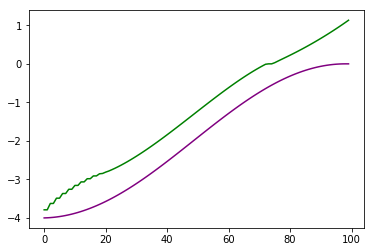

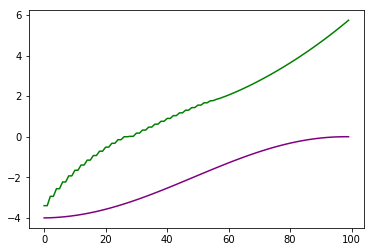

In [51]:

def plot(n, h):
    A = matr(n)
    H = dobavka(L, h)
    eigA = np.sort(np.linalg.eig(A)[0])
    eigH = np.sort(np.linalg.eig(H)[0])
    plt.figure()
    plt.plot(eigA, color = 'purple')
    plt.plot(eigH, color = 'green')

    
plot(n, h)
plot(n,10)

При появлении горба энергия частицы становится больше. Чем выше холм, тем серьезнее. 